<a href="https://colab.research.google.com/github/NikhilSajimon/DSA-ICT/blob/main/Data_Preprocessing_case_study_NikhilSaji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
house_pricing = pd.read_csv('/content/House_Pricing.csv')

In [3]:
house_pricing.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [5]:
house_pricing.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##Duplicate Removal
Rows: Check for duplicate rows in the dataset, if any, and remove them.

Columns: Identify and drop duplicate columns, if any, based on their values.

In [6]:
house_pricing.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
21608,False
21609,False
21610,False
21611,False


In [7]:
house_pricing.drop(columns=['ID', 'Date House was Sold','Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Times Visited', 'Renovated Year', 'Zipcode'], inplace=True)

In [8]:
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21613 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   No of Floors                               21613 non-null  float64
 4   Waterfront View                            21613 non-null  object 
 5   Condition of the House                     21613 non-null  object 
 6   Overall Grade                              21613 non-null  int64  
 7   Area of the House from Basement (in Sqft)  21610 non-null  float64
 8   Basement Area (in Sqft)                    21613 non-null  int64  
 9   Age of House (in Years)                    21613 non-null  int64  
 10  Latitude              

In [9]:
house_pricing['No of Bathrooms'] = np.ceil(house_pricing['No of Bathrooms'])

In [10]:
num_cols = house_pricing.select_dtypes(include=['int64', 'float64'])
num_cols

,Sale Price,No of Bedrooms,No of Bathrooms,No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3,1.0,1.0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650
1,538000.0,3,3.0,2.0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639
2,180000.0,2,1.0,1.0,6,770.0,0,85,47.7379,-122.233,2720.0,8062
3,604000.0,4,3.0,1.0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000
4,510000.0,3,2.0,1.0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,3.0,3.0,8,1530.0,0,9,47.6993,-122.346,1530.0,1509
21609,400000.0,4,3.0,2.0,8,2310.0,0,4,47.5107,-122.362,1830.0,7200
21610,402101.0,2,1.0,2.0,7,1020.0,0,9,47.5944,-122.299,1020.0,2007
21611,400000.0,3,3.0,2.0,8,1600.0,0,14,47.5345,-122.069,1410.0,1287


In [11]:
num_cols.corr()[ 'Sale Price'].sort_values(ascending=False)

,Sale Price
Sale Price,1.000000
Area of the House from Basement (in Sqft),0.605495
Living Area after Renovation (in Sqft),0.585393
Overall Grade,0.580654
No of Bathrooms,0.491847
Basement Area (in Sqft),0.323813
No of Bedrooms,0.308463
Latitude,0.306889
No of Floors,0.256941
Lot Area after Renovation (in Sqft),0.082445


## Handling Missing Values
Identify missing values in each column.

Handle missing values:\
For numerical columns, use imputation techniques like mean/median imputation.

For categorical columns, fill with mode.

Document your approach for each feature with missing data.

In [12]:
# cols_to_plot = num_cols.columns.to_list()
# fig, axes = plt.subplots(ncols=2, nrows=6, figsize=(10, 30))
# axes = axes.flatten()

# for i, col in enumerate(cols_to_plot):
#   sns.histplot(data=house_pricing, x=col, ax=axes[i], kde=True, bins=10)
#   axes[i].set_title(col)

# plt.tight_layout()
# plt.show()

In [13]:
from sklearn.impute import SimpleImputer, KNNImputer

sim_imputer = SimpleImputer(strategy = 'most_frequent')
knnimputer = KNNImputer(n_neighbors=15)

house_pricing[['No of Bathrooms']] = sim_imputer.fit_transform(house_pricing[['No of Bathrooms']])
house_pricing[['Sale Price']] = knnimputer.fit_transform(house_pricing[['Sale Price']])
house_pricing[['Latitude', 'Longitude']] = knnimputer.fit_transform(house_pricing[['Latitude','Longitude']])
house_pricing[['Living Area after Renovation (in Sqft)', 'Area of the House from Basement (in Sqft)']] = knnimputer.fit_transform(house_pricing[['Living Area after Renovation (in Sqft)', 'Area of the House from Basement (in Sqft)']])

# - Sale Price: Filled using KNN imputer. It uses nearby rows with similar features to estimate missing prices based on patterns in the data.
# - No of Bathrooms: Filled using mode imputation. The most common bathroom count is used to replace missing values, keeping the distribution realistic.
# - Latitude: Filled using KNN imputer. Nearby properties help estimate missing coordinates based on spatial similarity.
# - Longitude: Filled using KNN imputer. Works alongside latitude to maintain geographic consistency.
# - Living Area after Renovation: Filled using KNN imputer. It uses similar properties to estimate the renovated area, based on features like total area, number of rooms, and house grade.

In [14]:
house_pricing.isna().sum()

,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
No of Floors,0
Waterfront View,0
Condition of the House,0
Overall Grade,0
Area of the House from Basement (in Sqft),0
Basement Area (in Sqft),0
Age of House (in Years),0


In [15]:
house_pricing[['No of Bathrooms', 'No of Floors']] = house_pricing[['No of Bathrooms', 'No of Floors']].astype('int64')


In [16]:
house_pricing['Renovated Area of the House from Basement (in Sqft)'] = house_pricing['Living Area after Renovation (in Sqft)'] - house_pricing['Basement Area (in Sqft)']

In [17]:
house_pricing.head()

,Sale Price,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Renovated Area of the House from Basement (in Sqft)
0,221900.0,3,1,1,No,Fair,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,1340.0
1,538000.0,3,3,2,No,Fair,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,1290.0
2,180000.0,2,1,1,No,Fair,6,770.0,0,85,47.7379,-122.233,2720.0,8062,2720.0
3,604000.0,4,3,1,No,Excellent,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,450.0
4,510000.0,3,2,1,No,Fair,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,1800.0


In [18]:
house_pricing.drop(columns=['Area of the House from Basement (in Sqft)','Basement Area (in Sqft)'], inplace=True)

In [19]:
house_pricing.head()

,Sale Price,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,Condition of the House,Overall Grade,Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Renovated Area of the House from Basement (in Sqft)
0,221900.0,3,1,1,No,Fair,7,63,47.5112,-122.257,1340.0,5650,1340.0
1,538000.0,3,3,2,No,Fair,7,67,47.7210,-122.319,1690.0,7639,1290.0
2,180000.0,2,1,1,No,Fair,6,85,47.7379,-122.233,2720.0,8062,2720.0
3,604000.0,4,3,1,No,Excellent,7,53,47.5208,-122.393,1360.0,5000,450.0
4,510000.0,3,2,1,No,Fair,8,31,47.6168,-122.045,1800.0,7503,1800.0


##Scaling Numerical Variables
Identify all numerical columns (excluding the target variable SalePrice).

Scale these features using techniques like Min-Max scaling or Standard scaling.

In [20]:
from scipy.stats import skew

cols_to_check = house_pricing.select_dtypes(include=['int64', 'float64']).columns.to_list()
for col in cols_to_check:
  print(col, ':', skew(house_pricing[col]))

Sale Price : 4.021565366967545
No of Bedrooms : 1.9741625111266883
No of Bathrooms : 0.10941164188994389
No of Floors : 0.72612798788433
Overall Grade : 0.32144606707246076
Age of House (in Years) : 0.4697727924346765
Latitude : -0.48518849118786844
Longitude : 0.8849780867630916
Living Area after Renovation (in Sqft) : 1.108116813346686
Lot Area after Renovation (in Sqft) : 9.50608344063878
Renovated Area of the House from Basement (in Sqft) : 0.8384305950527892


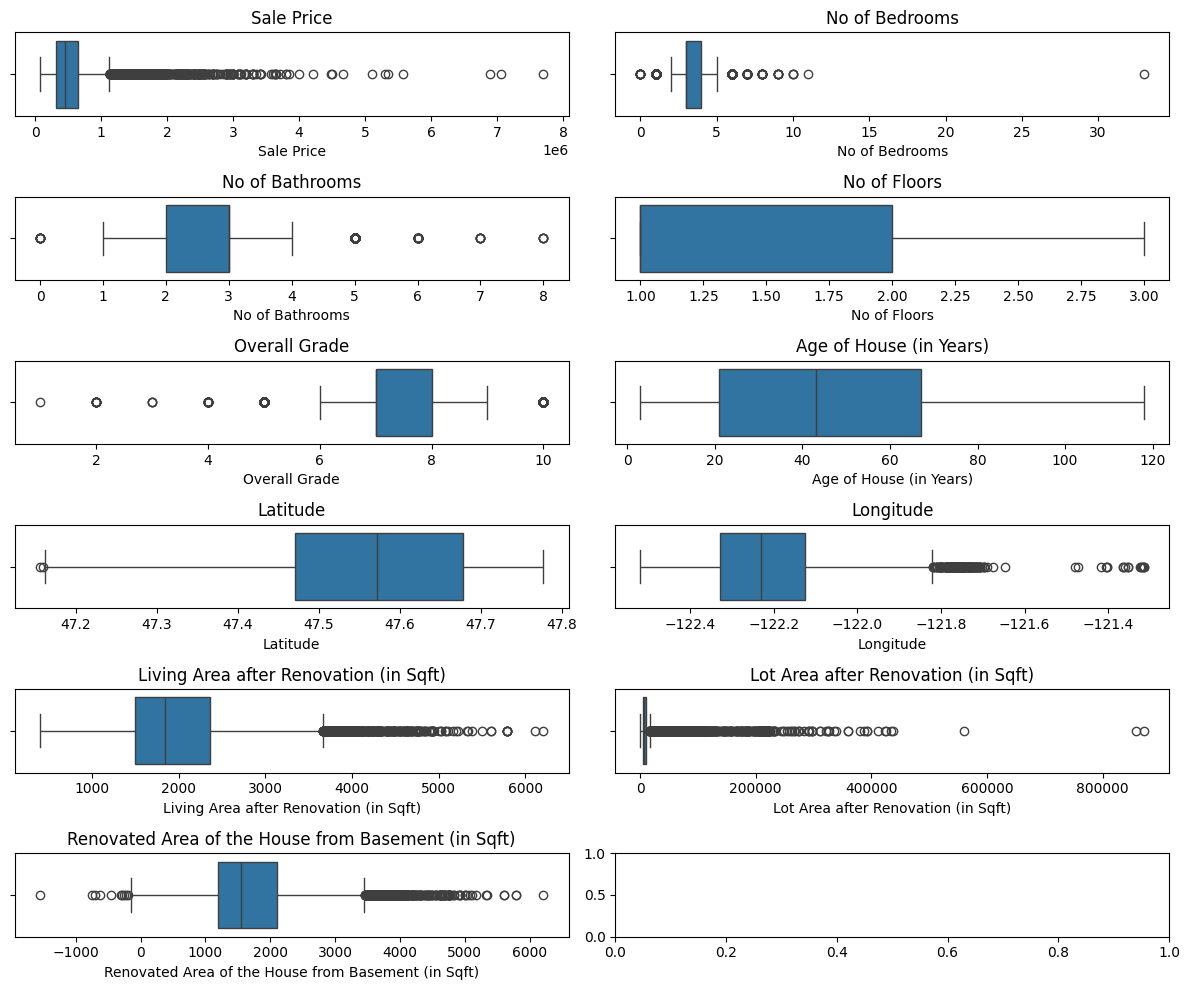

In [21]:
fig, axes = plt.subplots(ncols=2, nrows=6, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cols_to_check):
  sns.boxplot(data = house_pricing, x = col, ax = axes[i])
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [22]:
house_pricing[['Sale Price', 'No of Bedrooms',
               'Living Area after Renovation (in Sqft)',
               'Lot Area after Renovation (in Sqft)',
               'Renovated Area of the House from Basement (in Sqft)']].min()

,0
Sale Price,75000.0
No of Bedrooms,0.0
Living Area after Renovation (in Sqft),399.0
Lot Area after Renovation (in Sqft),651.0
Renovated Area of the House from Basement (in Sqft),-1550.0


In [23]:
house_pricing['Renovated Area of the House from Basement (in Sqft)'] = house_pricing['Renovated Area of the House from Basement (in Sqft)'].clip(lower=0)


In [24]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log1p, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

house_pricing[['Sale Price', 'No of Bedrooms',
               'Living Area after Renovation (in Sqft)',
               'Lot Area after Renovation (in Sqft)',]] = log_transformer.fit_transform(house_pricing[['Sale Price', 'No of Bedrooms',
                                                                                                      'Living Area after Renovation (in Sqft)',
                                                                                                      'Lot Area after Renovation (in Sqft)']])

house_pricing[['Renovated Area of the House from Basement (in Sqft)']] = sqrt_transformer.fit_transform(house_pricing[['Renovated Area of the House from Basement (in Sqft)']])


In [25]:
from scipy.stats import skew

cols_to_check = house_pricing.select_dtypes(include=['int64', 'float64']).columns.to_list()
for col in cols_to_check:
  print(col, ':', skew(house_pricing[col]))

Sale Price : 0.428818627870194
No of Bedrooms : -0.4754560388233142
No of Bathrooms : 0.10941164188994389
No of Floors : 0.72612798788433
Overall Grade : 0.32144606707246076
Age of House (in Years) : 0.4697727924346765
Latitude : -0.48518849118786844
Longitude : 0.8849780867630916
Living Area after Renovation (in Sqft) : 0.20695728970980165
Lot Area after Renovation (in Sqft) : 0.9671880699869738
Renovated Area of the House from Basement (in Sqft) : -0.02844797232976475


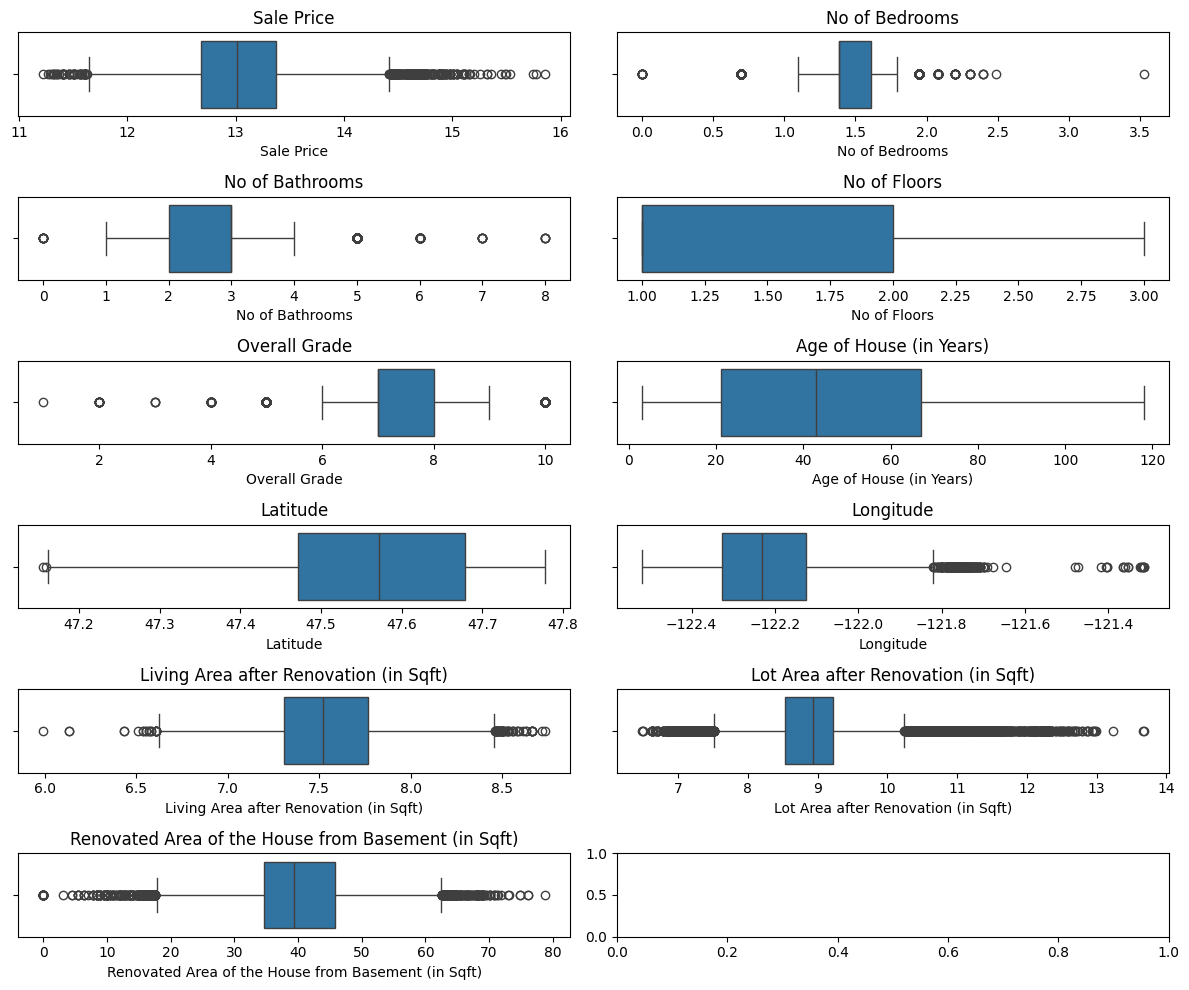

In [26]:
fig, axes = plt.subplots(ncols=2, nrows=6, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cols_to_check):
  sns.boxplot(data = house_pricing, x = col, ax = axes[i])
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

house_pricing[['Sale Price', 'No of Bedrooms', 'No of Bathrooms',
               'Overall Grade', 'Living Area after Renovation (in Sqft)',
               'Lot Area after Renovation (in Sqft)',
               'Renovated Area of the House from Basement (in Sqft)']] = std_scaler.fit_transform(house_pricing[['Sale Price', 'No of Bedrooms', 'No of Bathrooms',
                                                                                                                 'Overall Grade', 'Living Area after Renovation (in Sqft)',
                                                                                                                 'Lot Area after Renovation (in Sqft)',
                                                                                                                 'Renovated Area of the House from Basement (in Sqft)']])


house_pricing[['Latitude', 'Longitude']] = rob_scaler.fit_transform(house_pricing[['Latitude', 'Longitude']])

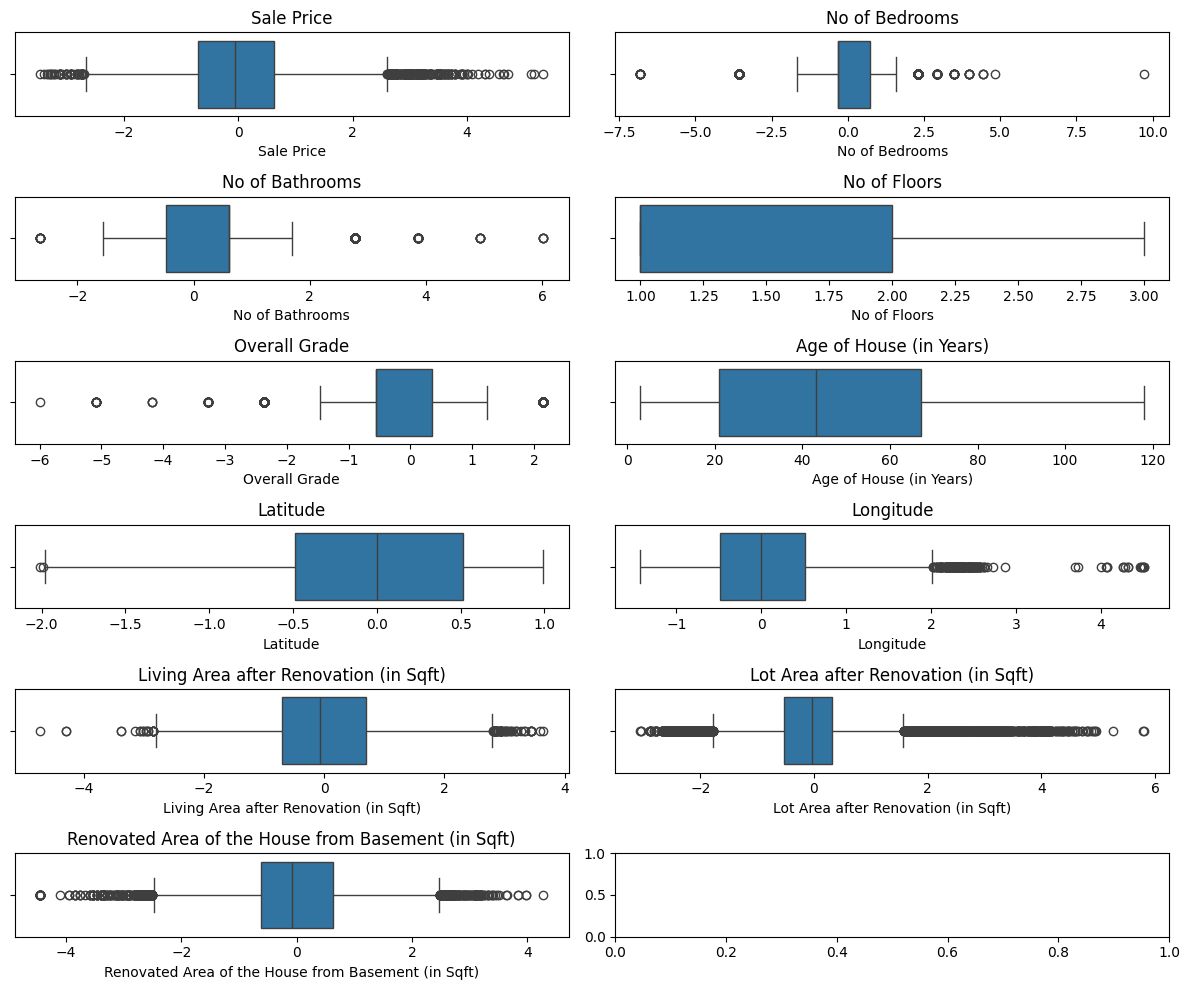

In [28]:
fig, axes = plt.subplots(ncols=2, nrows=6, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cols_to_check):
  sns.boxplot(data = house_pricing, x = col, ax = axes[i])
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [29]:
for col in cols_to_check:
  print(col, ':', skew(house_pricing[col]))

Sale Price : 0.4288186278701879
No of Bedrooms : -0.475456038823311
No of Bathrooms : 0.10941164188994366
No of Floors : 0.72612798788433
Overall Grade : 0.3214460670724597
Age of House (in Years) : 0.4697727924346765
Latitude : -0.48518849118796037
Longitude : 0.8849780867633467
Living Area after Renovation (in Sqft) : 0.20695728970979538
Lot Area after Renovation (in Sqft) : 0.9671880699869687
Renovated Area of the House from Basement (in Sqft) : -0.02844797232976614


## Encoding Categorical Variables
Identify all categorical columns in the dataset.

Apply appropriate encoding techniques:

Use One-Hot Encoding for nominal categories.

Use Label Encoding for ordinal categories, if applicable.

In [30]:
house_pricing['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [31]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

condition_order = [['Bad', 'Fair', 'Okay', 'Good', 'Excellent']]

le = LabelEncoder()
oe = OrdinalEncoder(categories=condition_order)

house_pricing['Waterfront View'] = le.fit_transform(house_pricing['Waterfront View'])
house_pricing['Condition of the House'] = oe.fit_transform(house_pricing[['Condition of the House']])

In [32]:
house_pricing.head()

,Sale Price,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,Condition of the House,Overall Grade,Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Renovated Area of the House from Basement (in Sqft)
0,-1.400837,-0.311106,-1.558591,1,0,1.0,-0.564013,63,-0.292754,-0.133005,-1.035129,-0.395577,-0.394722
1,0.280346,-0.311106,0.607143,2,0,1.0,-0.564013,67,0.720773,-0.438424,-0.326656,-0.024606,-0.471047
2,-1.798090,-1.658401,-1.558591,1,0,1.0,-1.468651,85,0.802415,-0.014778,1.126556,0.041685,1.326486
3,0.500008,0.733938,0.607143,1,0,4.0,-0.564013,53,-0.246377,-0.802956,-0.989902,-0.545895,-2.098792
4,0.178887,-0.311106,-0.475724,1,0,1.0,0.340626,31,0.217391,0.911330,-0.134122,-0.046701,0.249629


##Outlier Removal
Perform an outlier detection analysis on numerical variables (e.g., using the IQR method).

Remove outliers from these features if they are not representative of typical house prices.

In [33]:
import numpy as np
from scipy.stats import median_abs_deviation
from scipy.stats.mstats import winsorize


def iqr_clipper(arr):
  q1 = np.quantile(arr, 0.25)
  q3 = np.quantile(arr, 0.75)
  iqr = q3 - q1
  lowerbound = q1 - (1.5 * iqr)
  upperbound = q1 + (1.5 * iqr)
  return np.clip(arr, lowerbound, upperbound)

def zscore_clipper(arr):
  arr_mean = np.mean(arr)
  arr_std = np.std(arr)
  lowerbound = arr_mean - (3.5 * arr_std)
  upperbound = arr_mean + (3.5 * arr_std)
  return np.clip(arr, lowerbound, upperbound)

cols_to_iqr_clip = ['No of Bedrooms', 'No of Bathrooms', 'Overall Grade']
cols_to_zscore_clip = ['Latitude', 'Longitude']

In [34]:
for col in cols_to_iqr_clip:
  house_pricing[col] = iqr_clipper(house_pricing[col])

In [35]:
for col in cols_to_zscore_clip:
  house_pricing[col] = zscore_clipper(house_pricing[col])

In [36]:
house_pricing['Living Area after Renovation (in Sqft)'] = winsorize(house_pricing['Living Area after Renovation (in Sqft)'], limits = (0.05, 0.05))
house_pricing['Lot Area after Renovation (in Sqft)'] = winsorize(house_pricing['Lot Area after Renovation (in Sqft)'], limits = (0.05, 0.1))
house_pricing['Renovated Area of the House from Basement (in Sqft)'] = winsorize(house_pricing['Renovated Area of the House from Basement (in Sqft)'], limits = (0.05, 0.05))


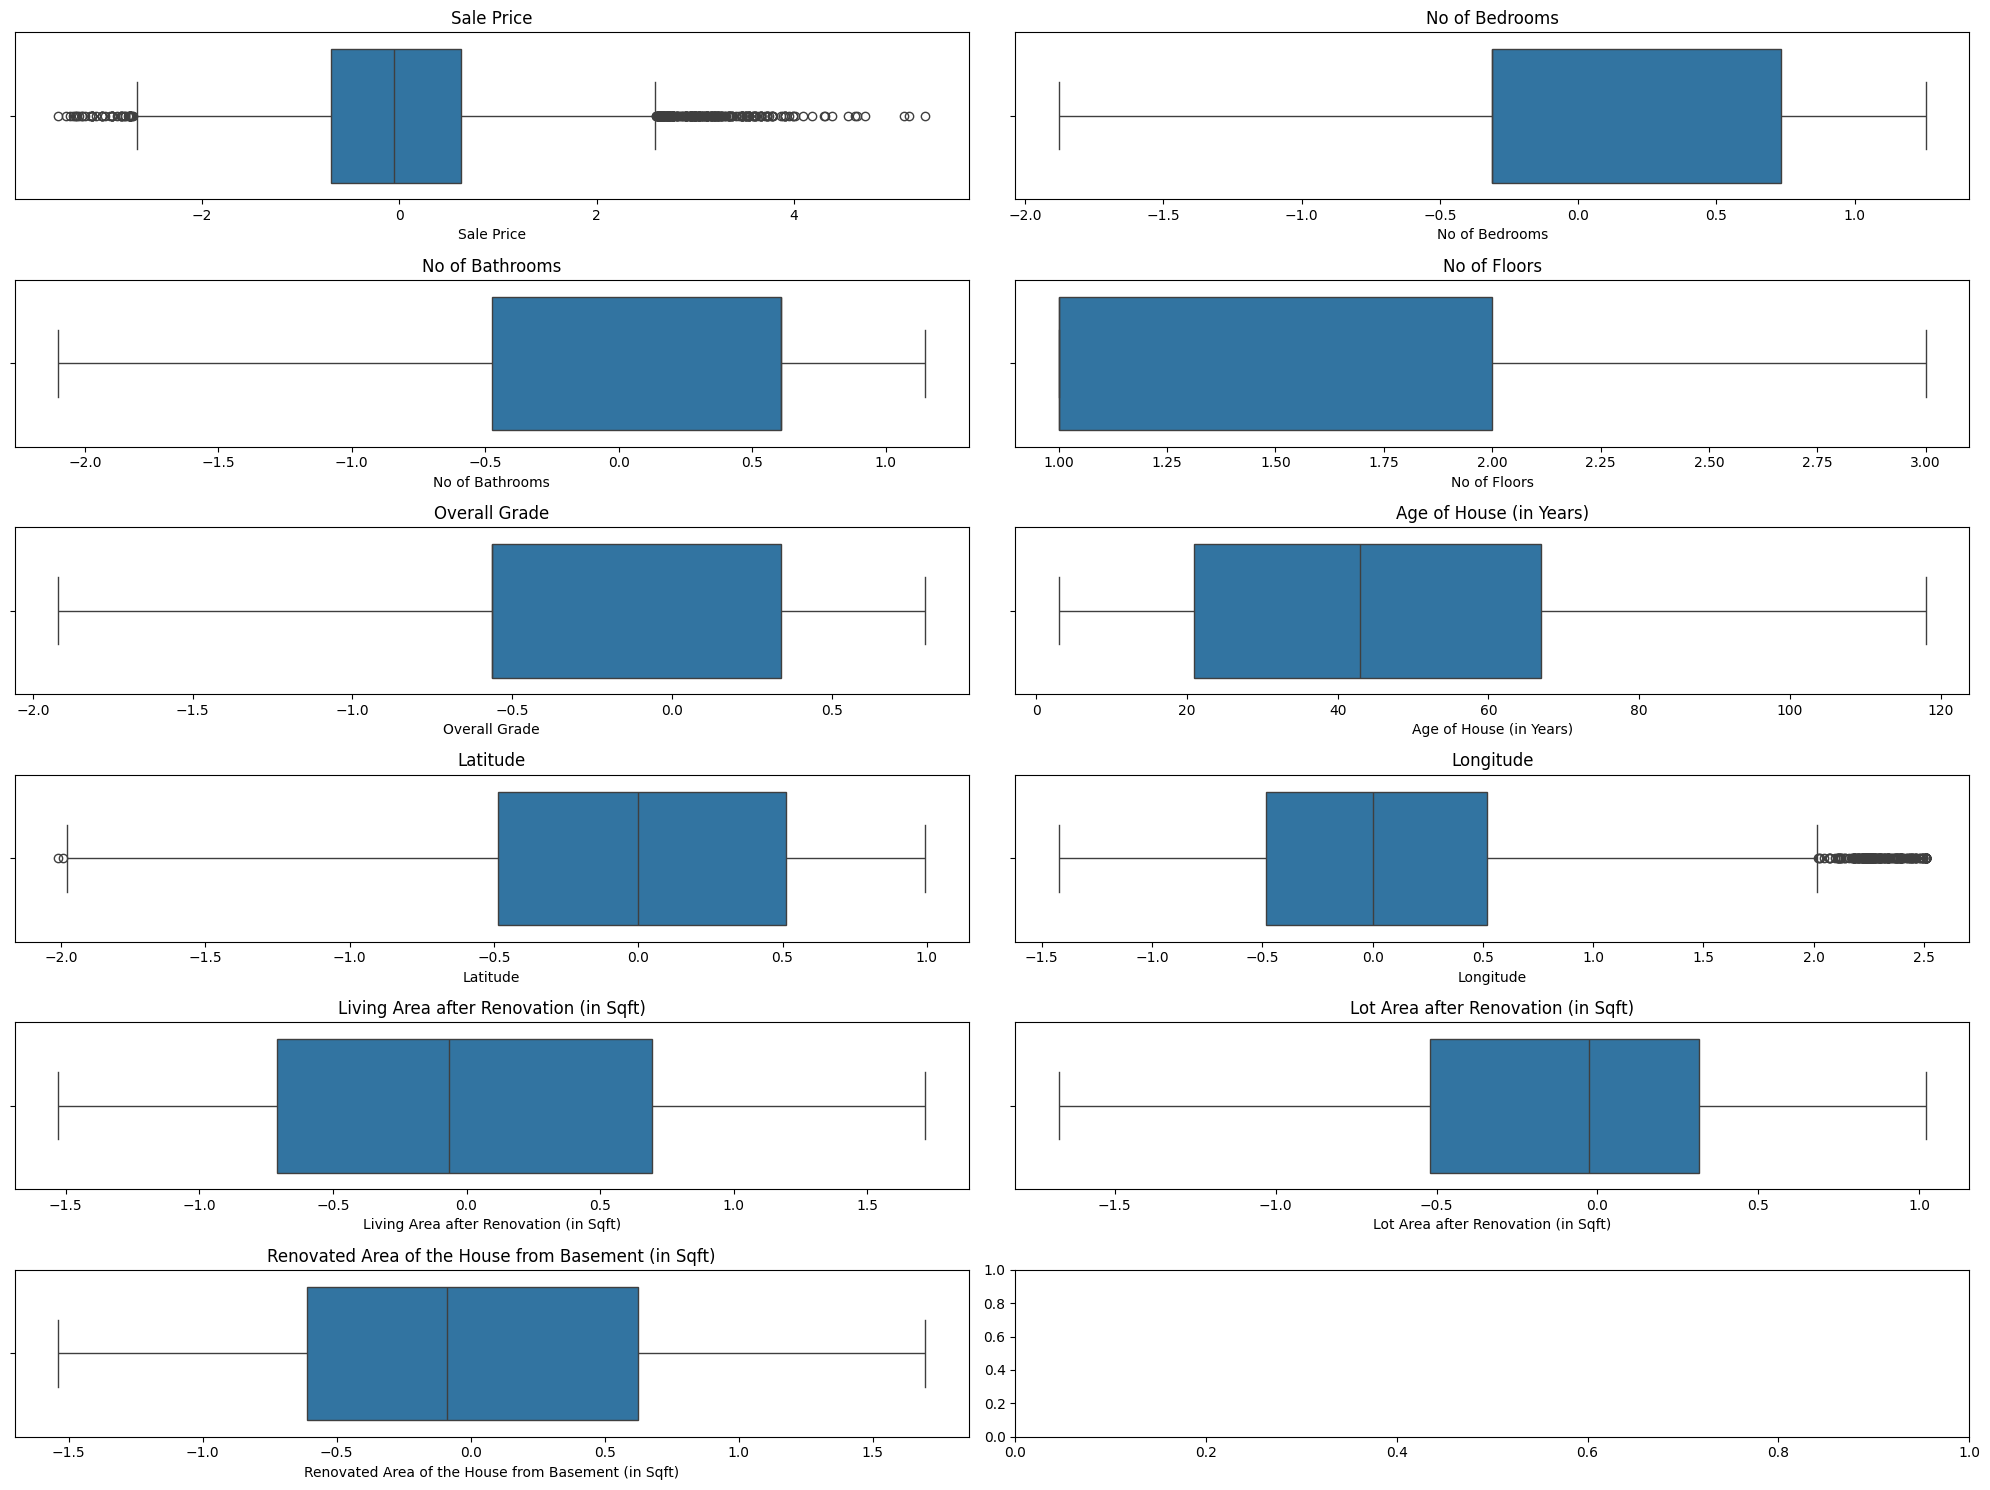

In [37]:
fig, axes = plt.subplots(ncols=2, nrows=6, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(cols_to_check):
  sns.boxplot(data = house_pricing, x = col, ax = axes[i])
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Train-Test Split
Set aside the SalePrice column as the target variable.

Split the dataset into training (80%) and testing (20%) sets using the train_test_split function from sklearn.

In [38]:
from sklearn.model_selection import train_test_split

y = house_pricing['Sale Price']
X = house_pricing.drop(columns=['Sale Price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17290, 12)
(17290,)
(4323, 12)
(4323,)
